# AI-Powered Cybersecurity Threat Detection
- Kanishk Ashra | kanishkashra@gmail.com | ashra1@ualberta.ca
### Project Overview
This project leverages machine learning to detect and classify anomalies in web traffic, focusing on securing cloud-based systems. Using data such as VPC flow logs, the project identifies patterns of attacks (e.g., DDoS, SQL Injection) and provides actionable insights to mitigate risks.

### Objectives
1. Detect anomalies in web traffic patterns.
2. Classify attack types (e.g., DDoS, SQL Injection, Brute Force).
3. Analyze attack trends and generate visualizations for insights.
4. Provide recommendations for enhanced cybersecurity defenses.

### Dataset
The dataset contains traffic logs with features like `bytes_in`, `protocol`, `src_ip`, and `dst_port`, representing interactions between sources and destinations.


### Tools and Technologies
- **Languages**: Python
- **Libraries**: Pandas, Seaborn, Matplotlib, Plotly
- **Machine Learning**: Scikit-learn
- **Visualization**: Dash, Plotly

## The Data Legend is as follows:- 


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Column Name</th>
      <th>Data Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>bytes_in</td>
      <td>Numeric</td>
      <td>Amount of data received by the server in bytes.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>bytes_out</td>
      <td>Numeric</td>
      <td>Amount of data sent from the server in bytes.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>creation_time</td>
      <td>Timestamp</td>
      <td>Timestamp indicating when the record was logged.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>end_time</td>
      <td>Timestamp</td>
      <td>Timestamp marking the end of the connection.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>src_ip</td>
      <td>String</td>
      <td>The source IP address initiating the connection.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>src_ip_country_code</td>
      <td>String</td>
      <td>Country code corresponding to the source IP.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>protocol</td>
      <td>Categorical</td>
      <td>The communication protocol used in the connect...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>response_code</td>
      <td>Numeric</td>
      <td>HTTP status code returned by the server.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>dst_port</td>
      <td>Numeric</td>
      <td>The destination port used on the server.</td>
    </tr>
    <tr>
      <th>9</th>
      <td>dst_ip</td>
      <td>String</td>
      <td>The destination IP address receiving the conne...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>rule_names</td>
      <td>String</td>
      <td>Name of the detection rule triggered by the tr...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>observation_name</td>
      <td>String</td>
      <td>Labels describing the nature of the observed t...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>source_meta</td>
      <td>String</td>
      <td>Metadata associated with the traffic source.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>source_name</td>
      <td>String</td>
      <td>Identifier or name of the source generating th...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>time</td>
      <td>Timestamp</td>
      <td>Time of the event detection or observation.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>detection_types</td>
      <td>String</td>
      <td>Type of detection mechanism applied to analyze...</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# File path to the dataset
file_path = 'C:/Users/kanis/OneDrive/Desktop/CloudWatch_Traffic_Web_Attack.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


Dataset successfully loaded!


In [87]:
import pandas as pd  # DataFrame operations
import numpy as np   #Numerical computations
import matplotlib.pyplot as plt  # Plotting static graphs
import seaborn as sns            # type: ignore # Advanced data visualization
import plotly.express as px      # type: ignore # Interactive visualizations
import plotly.graph_objects as go  # type: ignore # Custom interactive plots
from sklearn.model_selection import train_test_split  # Dataset splitting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Feature scaling and encoding
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Robust classification model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Evaluation metrics
from datetime import datetime  # Timestamp handling
import warnings
warnings.filterwarnings('ignore')  
try:
    import ipywidgets as widgets  # For interactive widgets in Jupyter notebooks
except ModuleNotFoundError:
    print("The 'ipywidgets' library is not installed. You can install it using 'pip install ipywidgets'.")
print("All necessary libraries have been successfully imported. You are ready to proceed!")


All necessary libraries have been successfully imported. You are ready to proceed!


In [88]:
# File path to the dataset
file_path = 'C:/Users/kanis/OneDrive/Desktop/CloudWatch_Traffic_Web_Attack.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


Dataset successfully loaded!


Dataset Overview
1. **Purpose**: This cell loads the dataset and provides a quick summary of its structure.
2. **Key Information**:
   - `data.info()` displays column names, data types, and missing values.
   - `data.head()` previews the first 5 rows to understand key features.
3. **Significance**: The dataset contains traffic details such as `bytes_in`, `protocol`, and timestamps (`creation_time`, `end_time`) for analyzing and detecting anomalies in web traffic.


In [89]:
# Print the first 5 rows of the dataset to quickly inspect the structure and sample data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [90]:
# Print descriptive statistics for all columns in the dataset, including categorical ones
# 'include="all"' ensures statistics for both numerical and non-numerical columns are included

print(data.head())

   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious Web Traffic  

In [91]:
# Print descriptive statistics for all columns in the dataset, including categorical ones
# 'include="all"' ensures statistics for both numerical and non-numerical columns are included
print(data.describe(include='all'))

            bytes_in     bytes_out         creation_time  \
count   2.820000e+02  2.820000e+02                   282   
unique           NaN           NaN                    30   
top              NaN           NaN  2024-04-26T09:00:00Z   
freq             NaN           NaN                    17   
mean    1.199390e+06  8.455429e+04                   NaN   
std     4.149312e+06  2.549279e+05                   NaN   
min     4.000000e+01  4.400000e+01                   NaN   
25%     5.381500e+03  1.114200e+04                   NaN   
50%     1.318200e+04  1.379950e+04                   NaN   
75%     3.083300e+04  2.627950e+04                   NaN   
max     2.520779e+07  1.561220e+06                   NaN   

                    end_time         src_ip src_ip_country_code protocol  \
count                    282            282                 282      282   
unique                    30             28                   7        1   
top     2024-04-26T09:10:00Z  165.225.209.4        

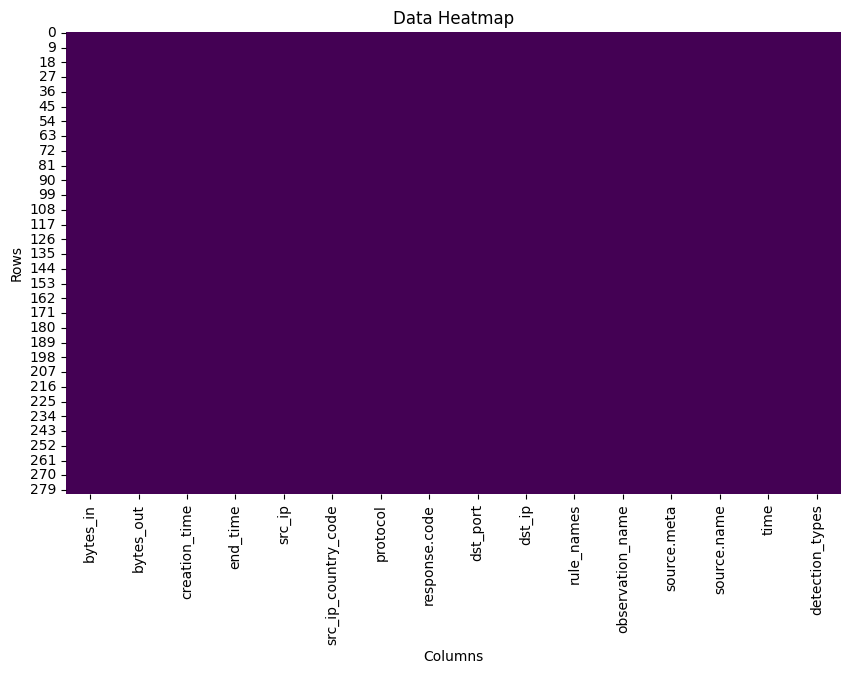

In [92]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(data.isnull(), annot=False, cbar=False, cmap='viridis')  # Plot missing data heatmap
plt.xlabel('Columns')  # Adding a label for the x-axis
plt.ylabel('Rows')  # Adding a label for the y-axis
plt.title('Data Heatmap')  # Setting the title of the plot
plt.show()  # Display the plot

 Data Transformation and Scaling
 Purpose:
1. **Log Transformation**: Applied to stabilize variance and manage features with highly skewed distributions (e.g., `bytes_in`, `bytes_out`).
2. **Scaling**: MinMaxScaler is used to normalize numerical columns to a [0, 1] range, ensuring consistent scaling across features.

Steps:
- Selected columns with non-homogeneous variance: `bytes_in`, `bytes_out`, `response.code`, and `dst_port`.
- Applied `log1p` to handle potential zeros in the dataset.
- Scaled all numerical columns to improve the performance of machine learning models.

Transformed Dataset:
The transformed dataset is ready for anomaly detection and classification.


In [93]:
# Columns with non-homogeneous variance
columns_to_normalize = ['bytes_out', 'response.code', 'dst_port', 'bytes_out']
# Applying log transformation to stabilize variance
for col in columns_to_normalize:
    if col in data.columns:  # Check if the column exists
       data[col] = np.log1p(data[col])  # log1p handles log(0) safely
# ===============================
# 🔧 Scaling Features
# ===============================

# Importing MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler
# Initialize scaler
scaler = MinMaxScaler()
# Selecting numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Columns with non-homogeneous variance
columns_to_normalize = ['bytes_out', 'response.code', 'dst_port']
# Applying log transformation to stabilize variance
for col in columns_to_normalize:
    data[col] = np.log1p(data[col])  # log1p handles log(0) safely

In [94]:
# Scaling the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("\n📋 Transformed Dataset (First 5 Rows):")
print(data.head())


📋 Transformed Dataset (First 5 Rows):
   bytes_in  bytes_out         creation_time              end_time  \
0  0.000221   0.712927  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1  0.001225   0.738245  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2  0.001129   0.715696  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3  0.001210   0.720146  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4  0.000257   0.718062  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            0.0       0.0   
1     165.225.33.6                  US    HTTPS            0.0       0.0   
2  165.225.212.255                  CA    HTTPS            0.0       0.0   
3   136.226.64.114                  US    HTTPS            0.0       0.0   
4   165.225.240.79                  NL    HTTPS            0.0       0.0   

         dst_ip              rule_names                      observation_name  \
0 

In [95]:
# Check if the scaling was successful
print("\n📊 Summary Statistics After Scaling:")
print(data[numerical_columns].describe())


📊 Summary Statistics After Scaling:
         bytes_in   bytes_out  response.code  dst_port
count  282.000000  282.000000          282.0     282.0
mean     0.047579    0.726598            0.0       0.0
std      0.164605    0.112871            0.0       0.0
min      0.000000    0.000000            0.0       0.0
25%      0.000212    0.701027            0.0       0.0
50%      0.000521    0.717551            0.0       0.0
75%      0.001222    0.764802            0.0       0.0
max      1.000000    1.000000            0.0       0.0


 Numerical Feature Distributions

 Purpose:
Analyze the distributions of key numerical features to identify patterns, skewness, and potential anomalies in web traffic data.

Insights:
- **`bytes_in` and `bytes_out`**: Highly skewed with small values dominating, but large spikes suggest potential anomalies like DDoS attacks.
- **`response_code`**: Limited variance, focusing on specific HTTP response statuses.
- **`dst_port`**: Concentrated distribution indicating targeted services or attack patterns.


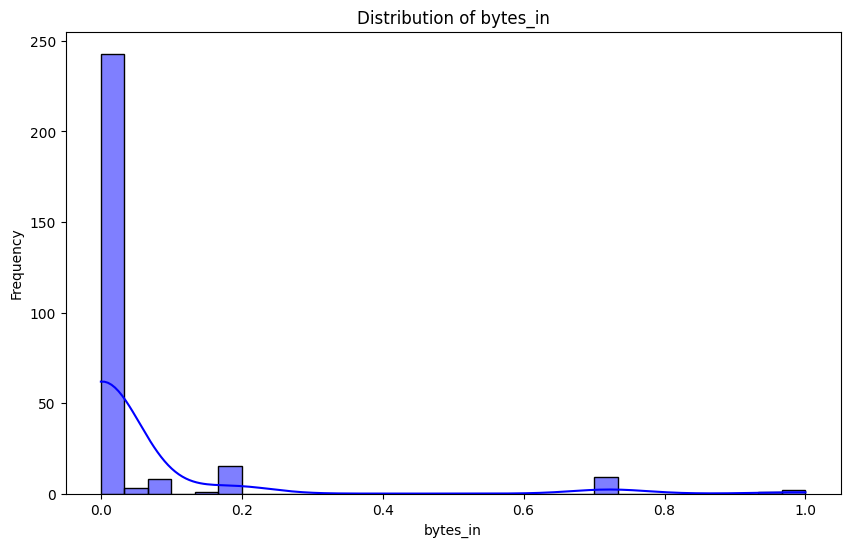

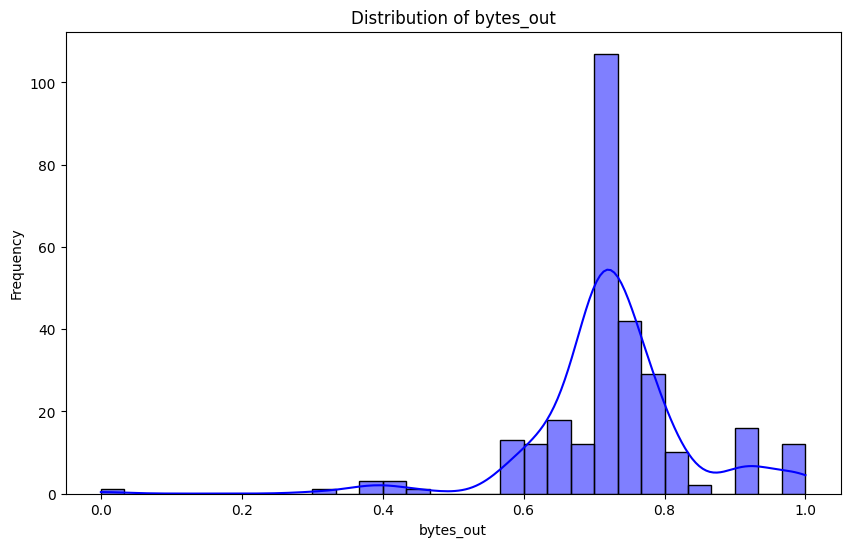

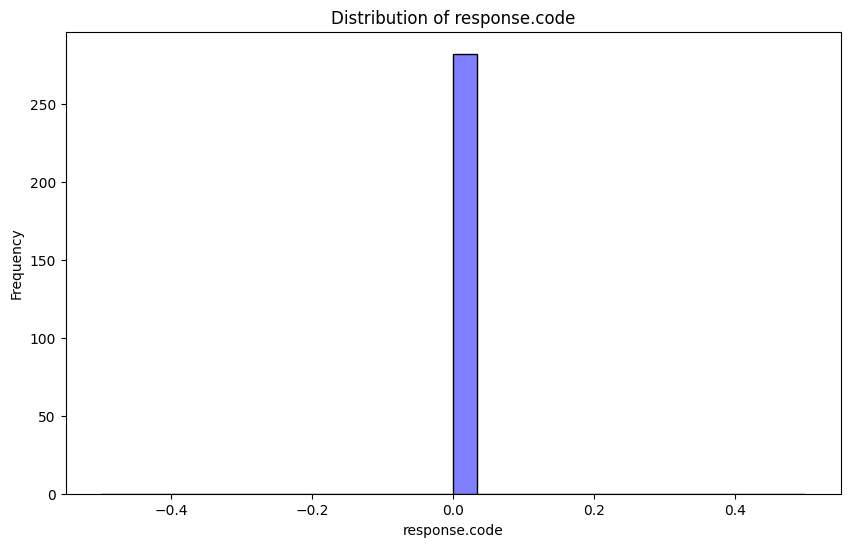

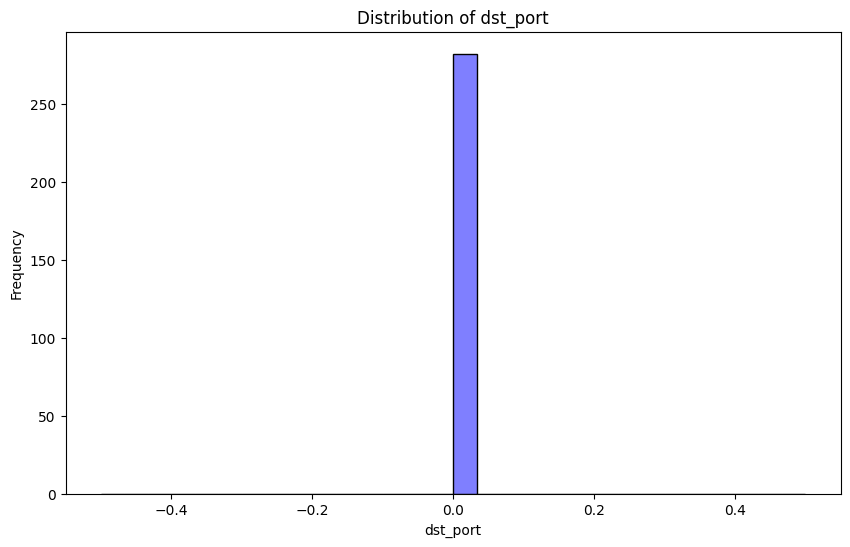

In [96]:
# Visualizing distributions for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Feature Correlation Analysis
Purpose:
- This heatmap visualizes correlations between numerical features to identify dependencies that may impact anomaly detection. 

Insights:
- **`bytes_in` and `bytes_out`**: Show a moderate positive correlation (0.60), suggesting a relationship between incoming and outgoing traffic.
- Minimal correlations with other features indicate independent behaviors, which is beneficial for feature diversity in modeling.
- Highlights potential feature interactions critical for anomaly detection and classification tasks.


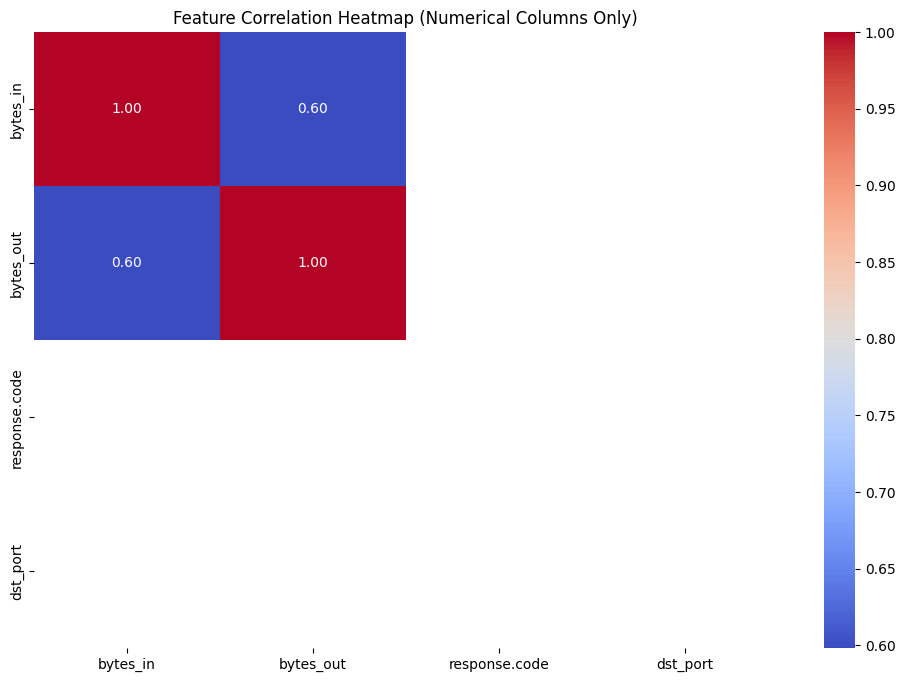

In [97]:
# ===============================
# 📈 Feature Correlation Analysis (Fixed)
# ===============================

# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numerical Columns Only)')
plt.show()

Categorical Feature Analysis
Purpose:
- Analyze the unique values and distributions of categorical features to uncover trends and potential patterns in traffic data.

### Insights:
1. **`creation_time` and `end_time`**: Activity peaks reveal timeframes with high network interactions, potentially linked to attacks.
2. **`src_ip_country_code`**: Dominance of US and Canada as source countries suggests localized traffic or region-specific attacks.
3. This analysis aids in identifying hotspots and understanding traffic behavior across time and regions.



🗂 Unique Values in creation_time:
creation_time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:40:00Z    11
2024-04-26T09:50:00Z    11
2024-04-25T23:10:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:00:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T00:40:00Z    10
2024-04-26T01:00:00Z    10
2024-04-26T00:10:00Z    10
2024-04-26T01:10:00Z     9
2024-04-26T09:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:00:00Z     8
2024-04-25T23:30:00Z     8
2024-04-26T09:20:00Z     8
2024-04-26T00:20:00Z     8
2024-04-26T08:30:00Z     8
2024-04-26T01:50:00Z     8
2024-04-26T08:00:00Z     7
2024-04-26T08:10:00Z     7
2024-04-26T08:40:00Z     7
2024-04-26T00:50:00Z     6
Name: count, dtype: int64


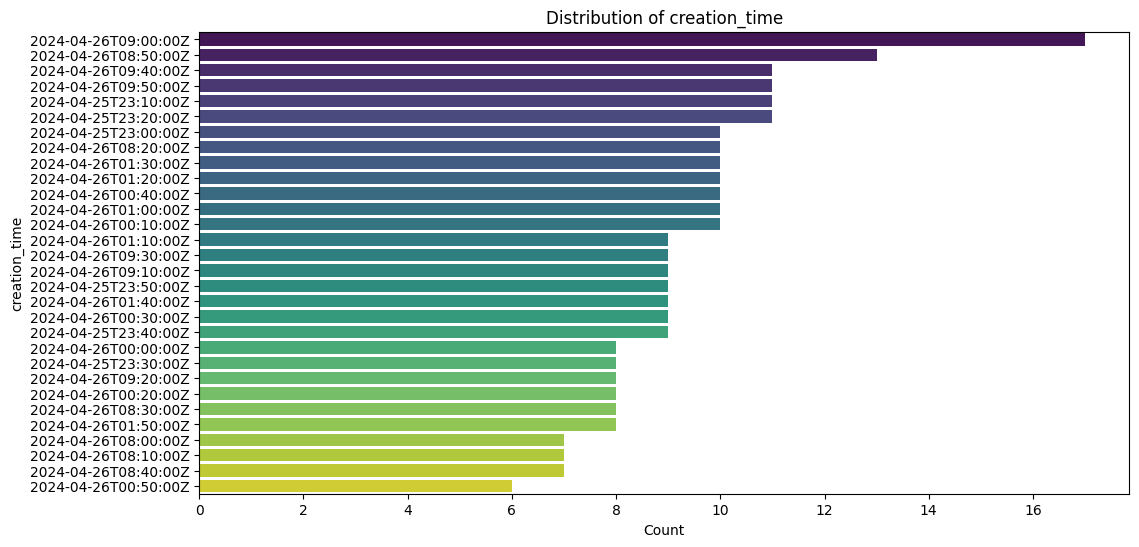


🗂 Unique Values in end_time:
end_time
2024-04-26T09:10:00Z    17
2024-04-26T09:00:00Z    13
2024-04-26T09:50:00Z    11
2024-04-26T10:00:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:30:00Z    11
2024-04-25T23:10:00Z    10
2024-04-26T08:30:00Z    10
2024-04-26T01:40:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T00:50:00Z    10
2024-04-26T01:10:00Z    10
2024-04-26T00:20:00Z    10
2024-04-26T01:20:00Z     9
2024-04-26T09:40:00Z     9
2024-04-26T09:20:00Z     9
2024-04-26T00:00:00Z     9
2024-04-26T01:50:00Z     9
2024-04-26T00:40:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T00:10:00Z     8
2024-04-25T23:40:00Z     8
2024-04-26T09:30:00Z     8
2024-04-26T00:30:00Z     8
2024-04-26T08:40:00Z     8
2024-04-26T02:00:00Z     8
2024-04-26T08:10:00Z     7
2024-04-26T08:20:00Z     7
2024-04-26T08:50:00Z     7
2024-04-26T01:00:00Z     6
Name: count, dtype: int64


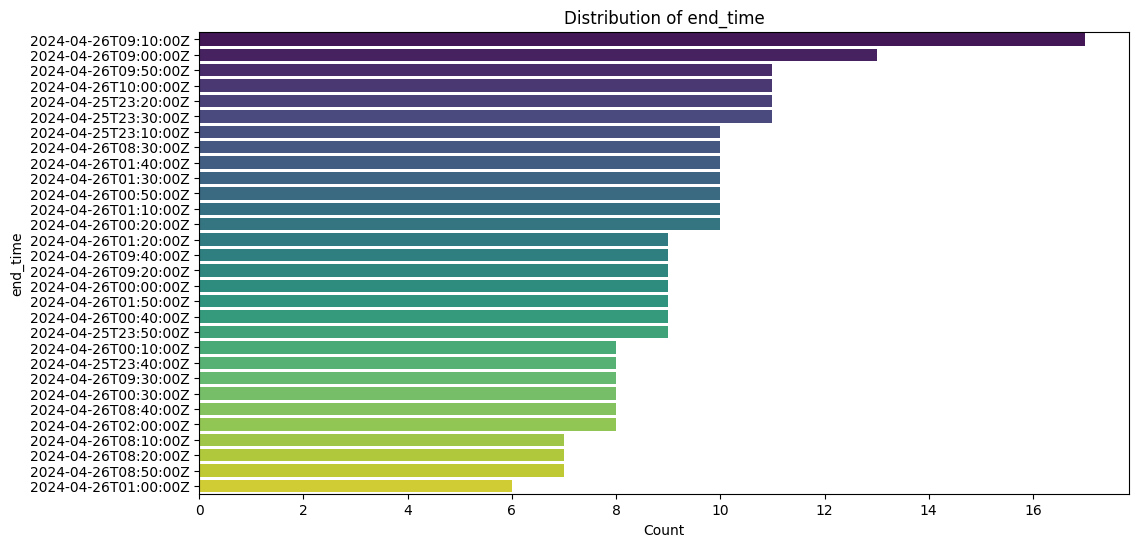


🗂 Unique Values in src_ip:
src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
136.226.64.114     13
165.225.33.6       12
165.225.213.7      11
136.226.80.97      11
165.225.8.79        6
192.241.230.19      2
65.49.1.69          2
198.235.24.81       1
65.49.1.72          1
65.49.1.94          1
65.49.1.104         1
65.49.1.97          1
65.49.1.99          1
65.49.1.76          1
65.49.1.96          1
65.49.1.95          1
65.49.1.74          1
192.241.205.18      1
Name: count, dtype: int64


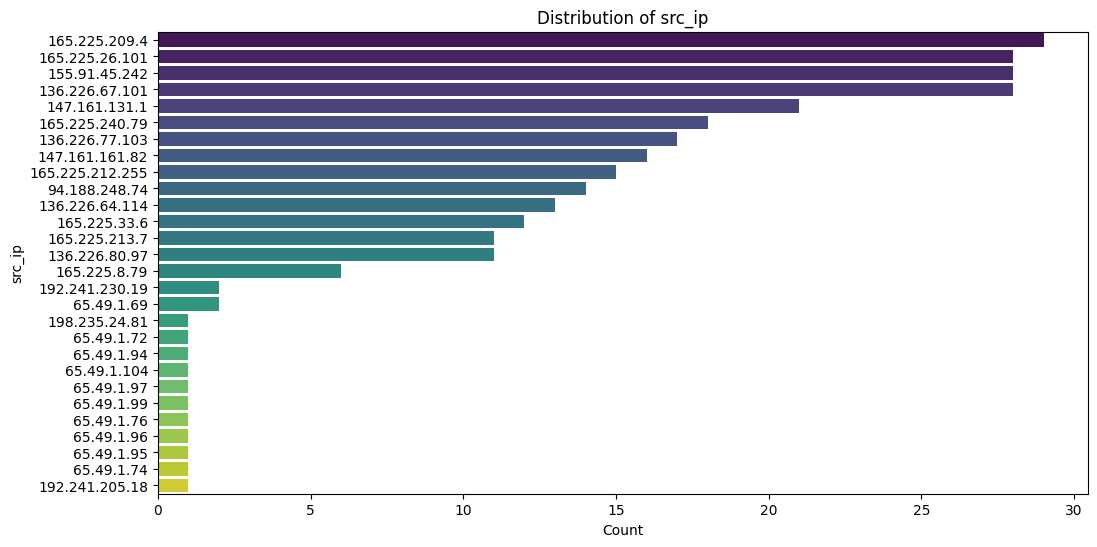


🗂 Unique Values in src_ip_country_code:
src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64


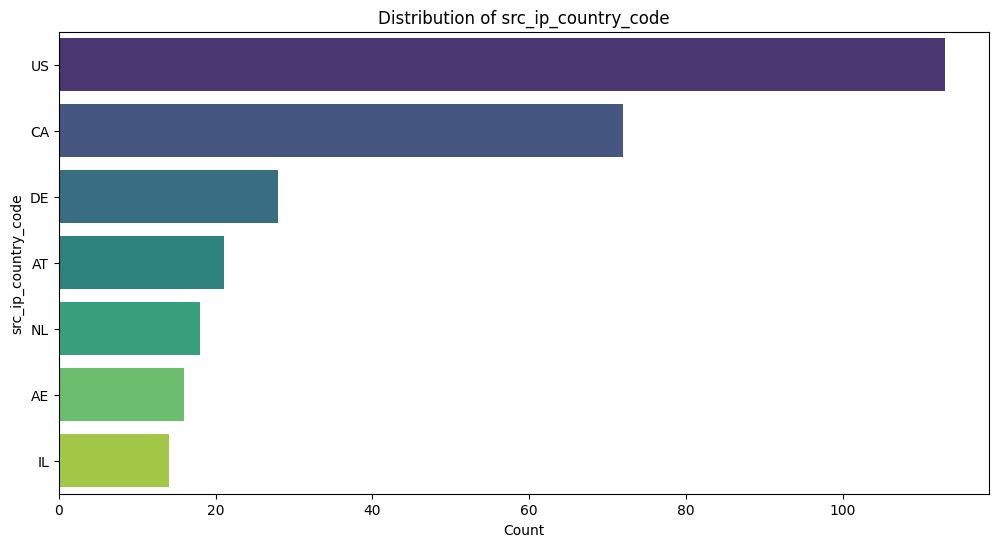


🗂 Unique Values in protocol:
protocol
HTTPS    282
Name: count, dtype: int64


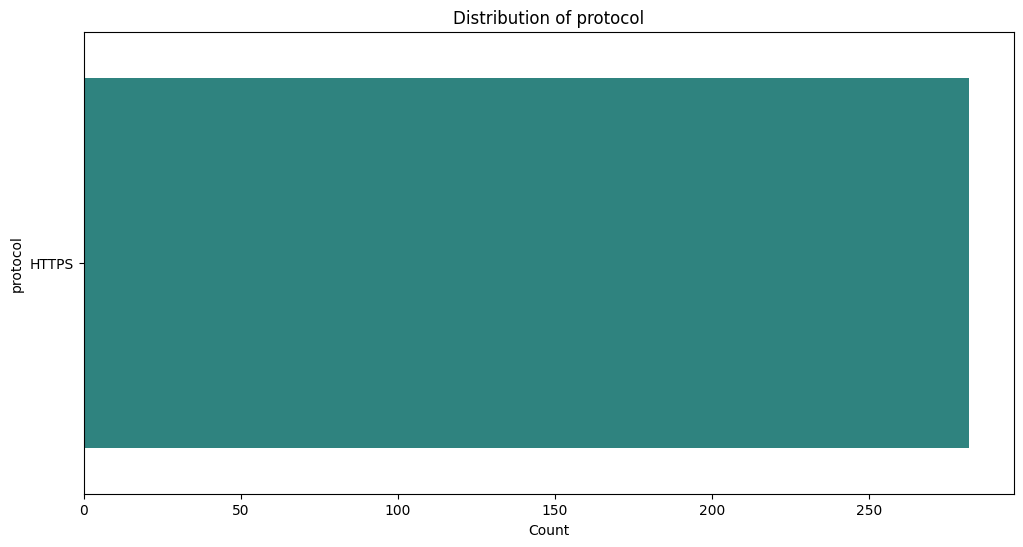


🗂 Unique Values in dst_ip:
dst_ip
10.138.69.97    282
Name: count, dtype: int64


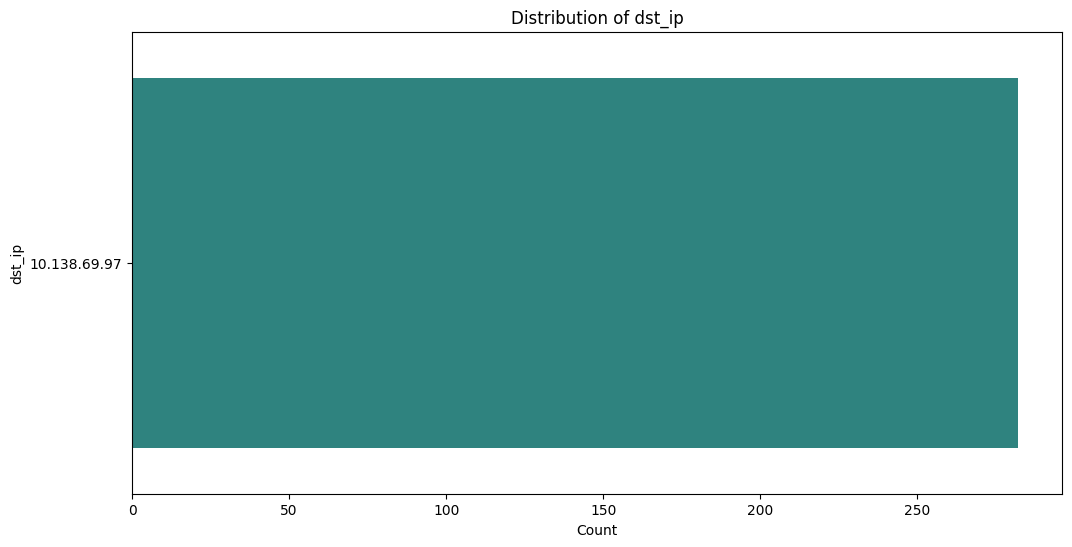


🗂 Unique Values in rule_names:
rule_names
Suspicious Web Traffic    282
Name: count, dtype: int64


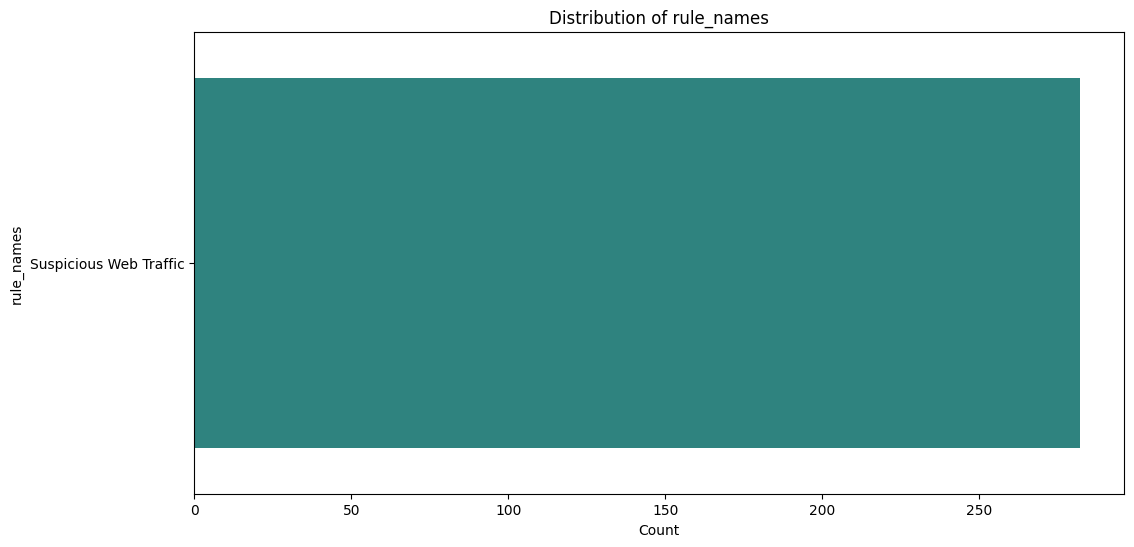


🗂 Unique Values in observation_name:
observation_name
Adversary Infrastructure Interaction    282
Name: count, dtype: int64


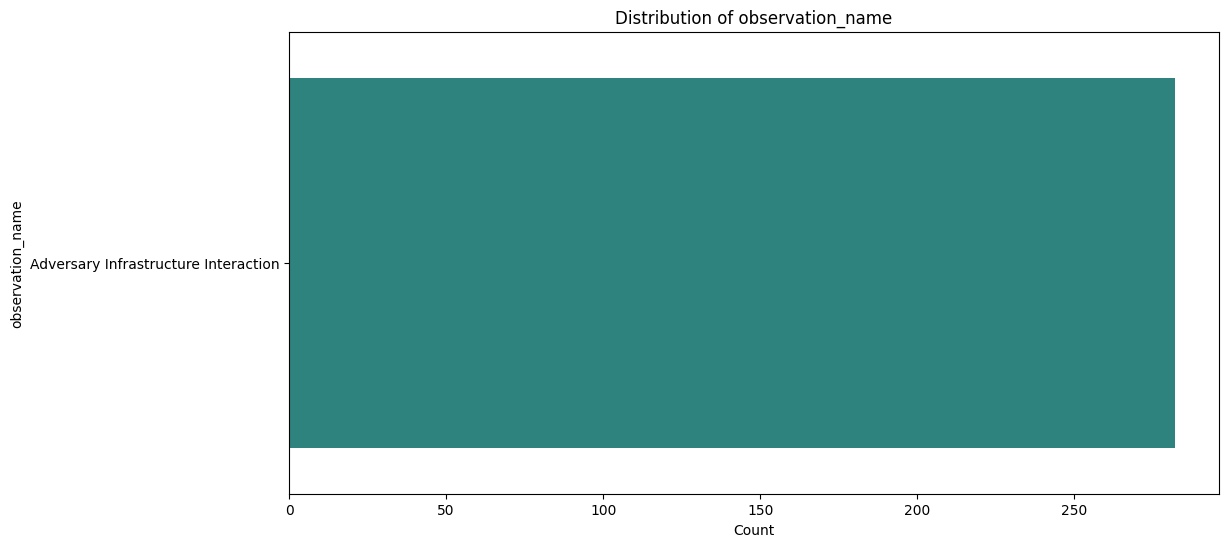


🗂 Unique Values in source.meta:
source.meta
AWS_VPC_Flow    282
Name: count, dtype: int64


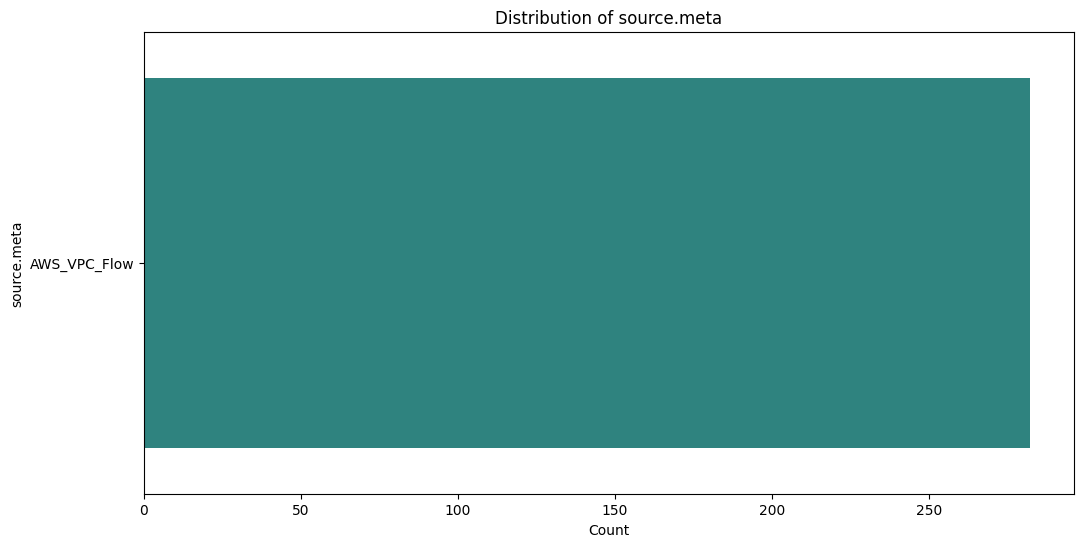


🗂 Unique Values in source.name:
source.name
prod_webserver    282
Name: count, dtype: int64


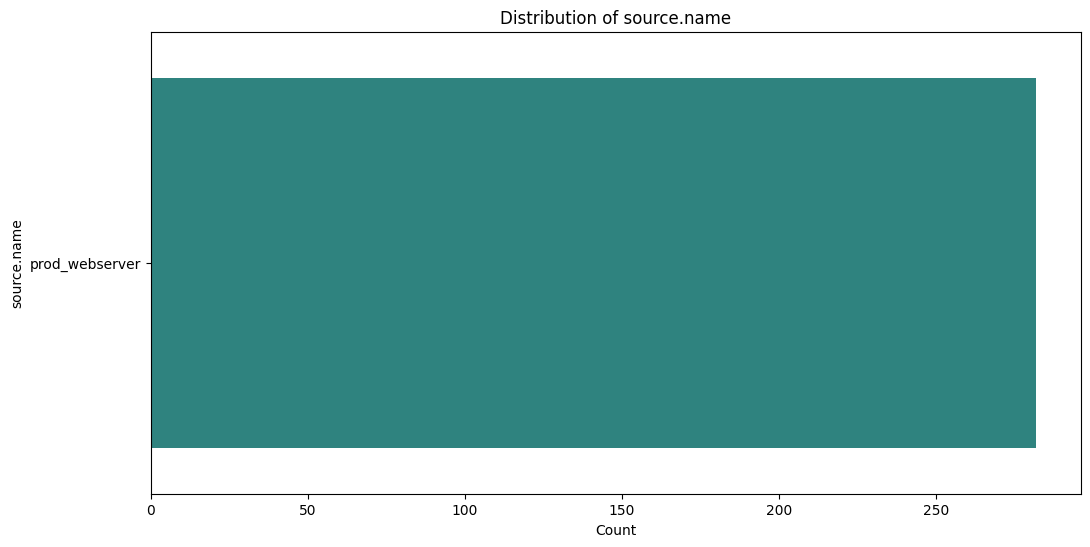


🗂 Unique Values in time:
time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:40:00Z    11
2024-04-26T09:50:00Z    11
2024-04-25T23:10:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:00:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T00:40:00Z    10
2024-04-26T01:00:00Z    10
2024-04-26T00:10:00Z    10
2024-04-26T01:10:00Z     9
2024-04-26T09:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:00:00Z     8
2024-04-25T23:30:00Z     8
2024-04-26T09:20:00Z     8
2024-04-26T00:20:00Z     8
2024-04-26T08:30:00Z     8
2024-04-26T01:50:00Z     8
2024-04-26T08:00:00Z     7
2024-04-26T08:10:00Z     7
2024-04-26T08:40:00Z     7
2024-04-26T00:50:00Z     6
Name: count, dtype: int64


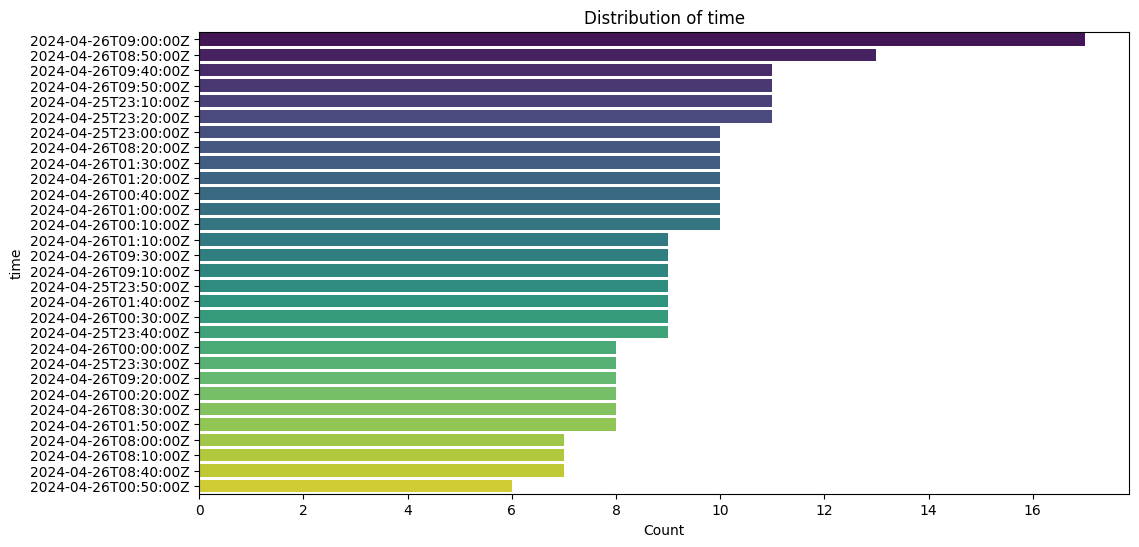


🗂 Unique Values in detection_types:
detection_types
waf_rule    282
Name: count, dtype: int64


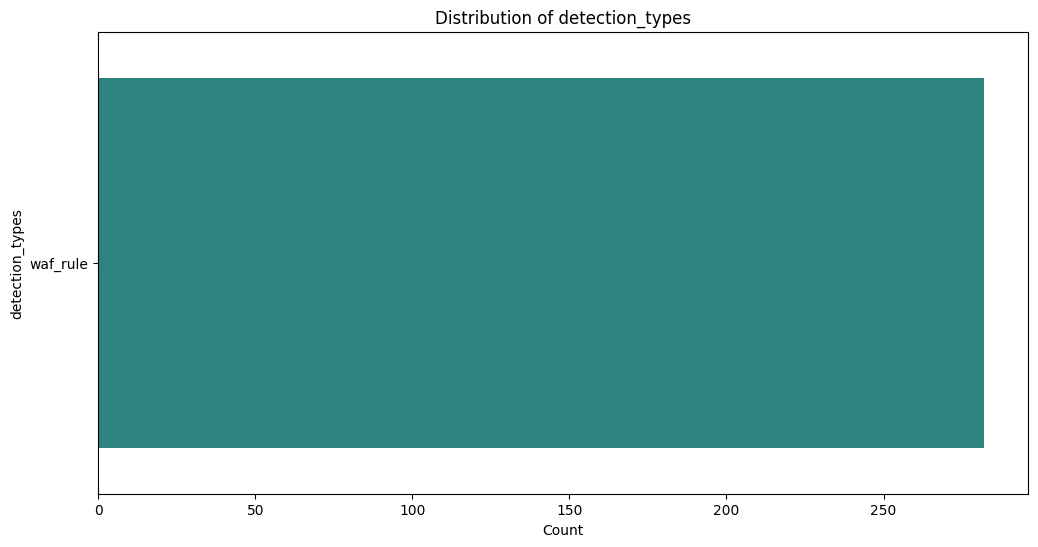

In [98]:
# ===============================
# 🔗 Advanced Categorical Insights
# ===============================

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n🗂 Unique Values in {col}:")
    print(data[col].value_counts())

    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

Time-Based Trend Analysis
Purpose:
- This plot visualizes the time-series trends for incoming (`bytes_in`) and outgoing (`bytes_out`) traffic over time.

Insights:
- Both traffic types show gradual increases, with notable spikes at specific intervals.
- Sudden peaks in traffic may correspond to anomalies like DDoS attacks or data exfiltration events.
- Helps identify high-activity periods for further investigation.


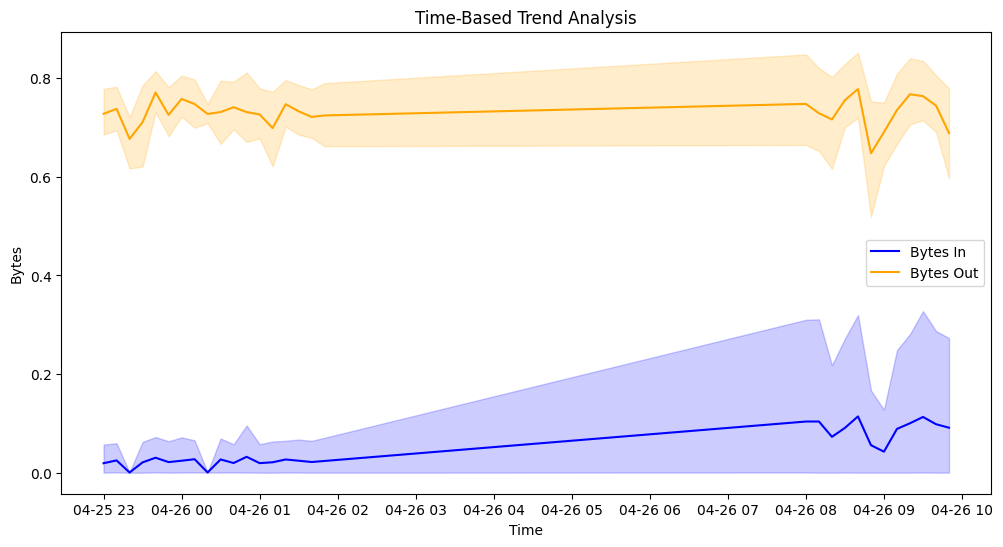

In [99]:
# ===============================
# 📅 Time-Based Trend Analysis
# ===============================

if 'time' in data.columns:
    data['time'] = pd.to_datetime(data['time'])

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='time', y='bytes_in', label='Bytes In', color='blue')
    sns.lineplot(data=data, x='time', y='bytes_out', label='Bytes Out', color='orange')
    plt.title('Time-Based Trend Analysis')
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.show()

Interactive Feature Relationship Matrix
Purpose:
- This interactive scatter matrix visualizes the relationships between numerical features while highlighting the `src_ip_country_code` as a categorical attribute.

Insights:
1. **Feature Relationships**: The plot reveals potential correlations, such as the relationship between `bytes_in` and `bytes_out`.
2. **Country Patterns**: Color coding by `src_ip_country_code` helps identify traffic trends originating from specific regions.
3. **Interactive Exploration**: Users can dynamically zoom in, filter, and analyze data clusters or outliers for specific countries and features.
4. **Significance**: Facilitates in-depth analysis of how features influence anomalies and attack patterns based on source countries.


In [100]:
import plotly.io as pio
pio.renderers.default = 'browser'  # Use browser to display interactive plots

try:
    import plotly.express as px

    # Interactive scatter plot for numerical relationships
    fig = px.scatter_matrix(data, dimensions=numerical_columns, color='src_ip_country_code')
    fig.update_layout(title='Interactive Feature Relationship Matrix', dragmode='select')
    fig.show()

except ImportError:
    print("Optional interactive visualizations skipped. Install Plotly for enhanced insights.")

In [101]:
# Define the target column
target_column = 'detection_types'  # Ensure this column exists in your dataset
if target_column not in data.columns:
    raise ValueError(f"❌ Target column '{target_column}' not found in the dataset.")
# Identify numerical and categorical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Numerical Features: {numerical_features}")
print(f"🗂️ Categorical Features: {categorical_features}")


🔢 Numerical Features: ['bytes_in', 'bytes_out', 'response.code', 'dst_port']
🗂️ Categorical Features: ['creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'detection_types']


In [102]:
# Splitting features and target
X = data.drop(columns=[target_column], errors='ignore')  # Features
y = data[target_column]  # Target variable
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📊 Dataset Split Completed:\n - Training set: {X_train.shape}\n - Testing set: {X_test.shape}")


📊 Dataset Split Completed:
 - Training set: (225, 15)
 - Testing set: (57, 15)


In [103]:
# ===============================
# 📊 Step 3: Preprocessing Pipelines
# ===============================
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standard scaling for numerical features
])
# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])
# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_features if col in X.columns]),
        ('cat', categorical_transformer, [col for col in categorical_features if col in X.columns])
    ])

Model Pipeline and Training
Purpose:
- Build and train an advanced machine learning pipeline for anomaly detection and attack classification.

Steps:
- **Pipeline**: Combines preprocessing and a Random Forest classifier into a single workflow.
- **Training**: Fits the model to detect patterns in traffic data, ensuring robust classification.
- Visual representation of the pipeline ensures easy interpretation and debugging.


In [104]:
# ===============================
# 🧠 Step 4: Defining the Model Pipeline
# ===============================
# Model pipeline with preprocessing and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])
# ===============================
# 🚀 Step 5: Model Training
# ===============================
print("\n🚀 Training Advanced Model Pipeline...")
model_pipeline.fit(X_train, y_train)


🚀 Training Advanced Model Pipeline...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bytes_in', 'bytes_out',
                                                   'response.code',
                                                   'dst_port']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['creation_time', 'end_time',
                                                   'src_ip',
                                                   'src_ip_country_code',
                                                   'protocol', 'dst_ip',
                                                   'rule_names',
                                                   'observation_name',
                                                   'source.meta',
                                                   'source.name'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Attack Pattern Heatmap by Type and Time
Purpose:
- This heatmap visualizes the intensity of different attack types (`observation_name`) over time, measured by the `Sum of Bytes In`.

Insights:
- **Time-based Trends**: Highlights periods of high activity for specific attack types, enabling temporal analysis of anomalies.
- **Attack Intensity**: Darker shades (higher values) indicate attack spikes, useful for identifying critical periods and attack patterns.
- **Proactive Defense**: Provides actionable insights for time-based threat monitoring and mitigation strategies.


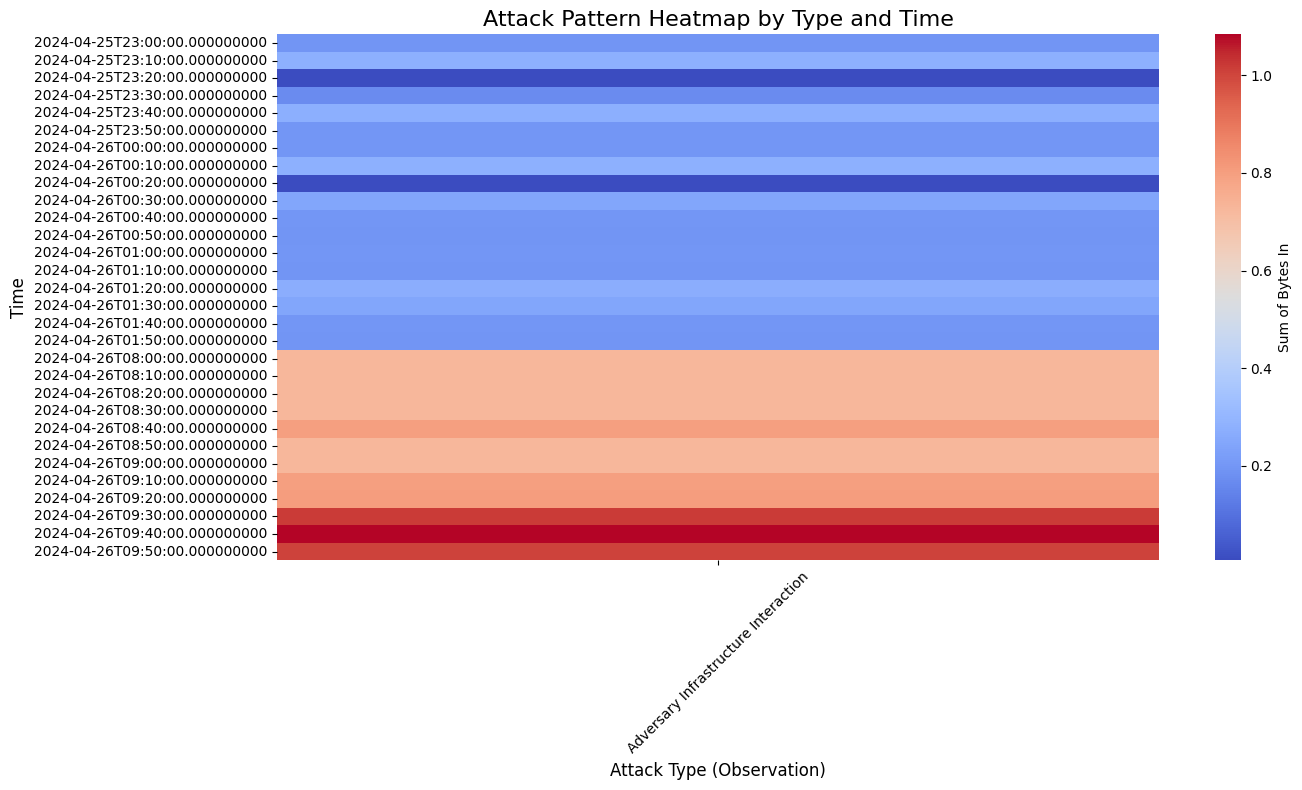

In [105]:
# Parse the 'creation_time' column to datetime format for time-based analysis
data['creation_time'] = pd.to_datetime(data['creation_time'])

# Pivot the data to create a heatmap-friendly structure
# Using 'creation_time' as rows and 'observation_name' as columns
# Aggregating by the sum of 'bytes_in' for analysis
heatmap_data = data.pivot_table(
    index='creation_time', 
    columns='observation_name', 
    values='bytes_in', 
    aggfunc='sum', 
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, 
    cmap='coolwarm', 
    annot=False, 
    cbar_kws={'label': 'Sum of Bytes In'}
)
plt.title('Attack Pattern Heatmap by Type and Time', fontsize=16)
plt.xlabel('Attack Type (Observation)', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hourly Attack Frequency Heatmap
Purpose:
- This heatmap illustrates the distribution of attack frequencies by the hour of the day and attack type, providing insights into temporal attack patterns.

Insights:
1. **High-Risk Hours**: Certain hours (e.g., 9 AM) exhibit a higher frequency of attacks, likely coinciding with system activity spikes or targeted campaigns.
2. **Attack Types**: Distribution across `observation_name` reveals which types are more common during specific time periods.
3. **Actionable Monitoring**: Enables focused monitoring during peak hours, enhancing response readiness for specific attack types.


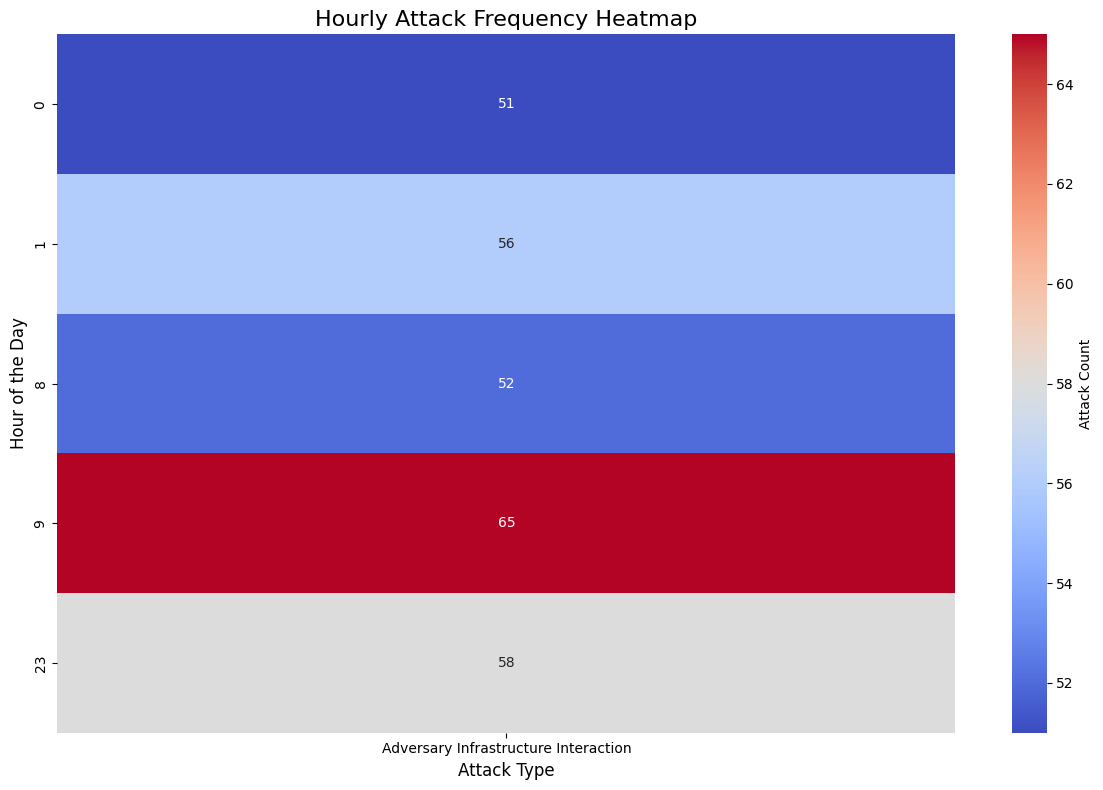

In [106]:
# Extract hour from 'creation_time'
data['Hour'] = data['creation_time'].dt.hour

# Group data by hour and attack type
hourly_attacks = data.groupby(['Hour', 'observation_name']).size().reset_index(name='Count')

# Pivot for a heatmap
heatmap_data = hourly_attacks.pivot(index='Hour', columns='observation_name', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Attack Count'})
plt.title('Hourly Attack Frequency Heatmap', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.tight_layout()
plt.show()